In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [ ]:
#Read file
dataset =  pd.read_excel('WDIW.xlsx')

In [ ]:
#Filtering only numerical values in X
X = dataset.iloc[:, 2:dataset.shape[1]]
Y=dataset.iloc[:,0:2]

In [ ]:
#Outliers
X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Death rate, crude (per 1,000 people)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GINI index (World Bank estimate),"Government expenditure on education, total (% of government expenditure)",Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)


In [ ]:
# to interpolate the missing values
# Interpolation method is linear, other interpolation methods can also be used according to their algorithms and type of data required 
dataset1=X.interpolate(method ='linear', limit_direction ='forward')
dataset2=dataset1.interpolate(method ='linear', limit_direction ='backward')
#Rounding off
dataset2=round(dataset2,2)

In [ ]:
#Returns True if data has any null values
dataset2.isnull().values.any()

True

In [ ]:
df_col_merged =pd.concat([Y, dataset2], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71add1e208>,
      dtype=object)

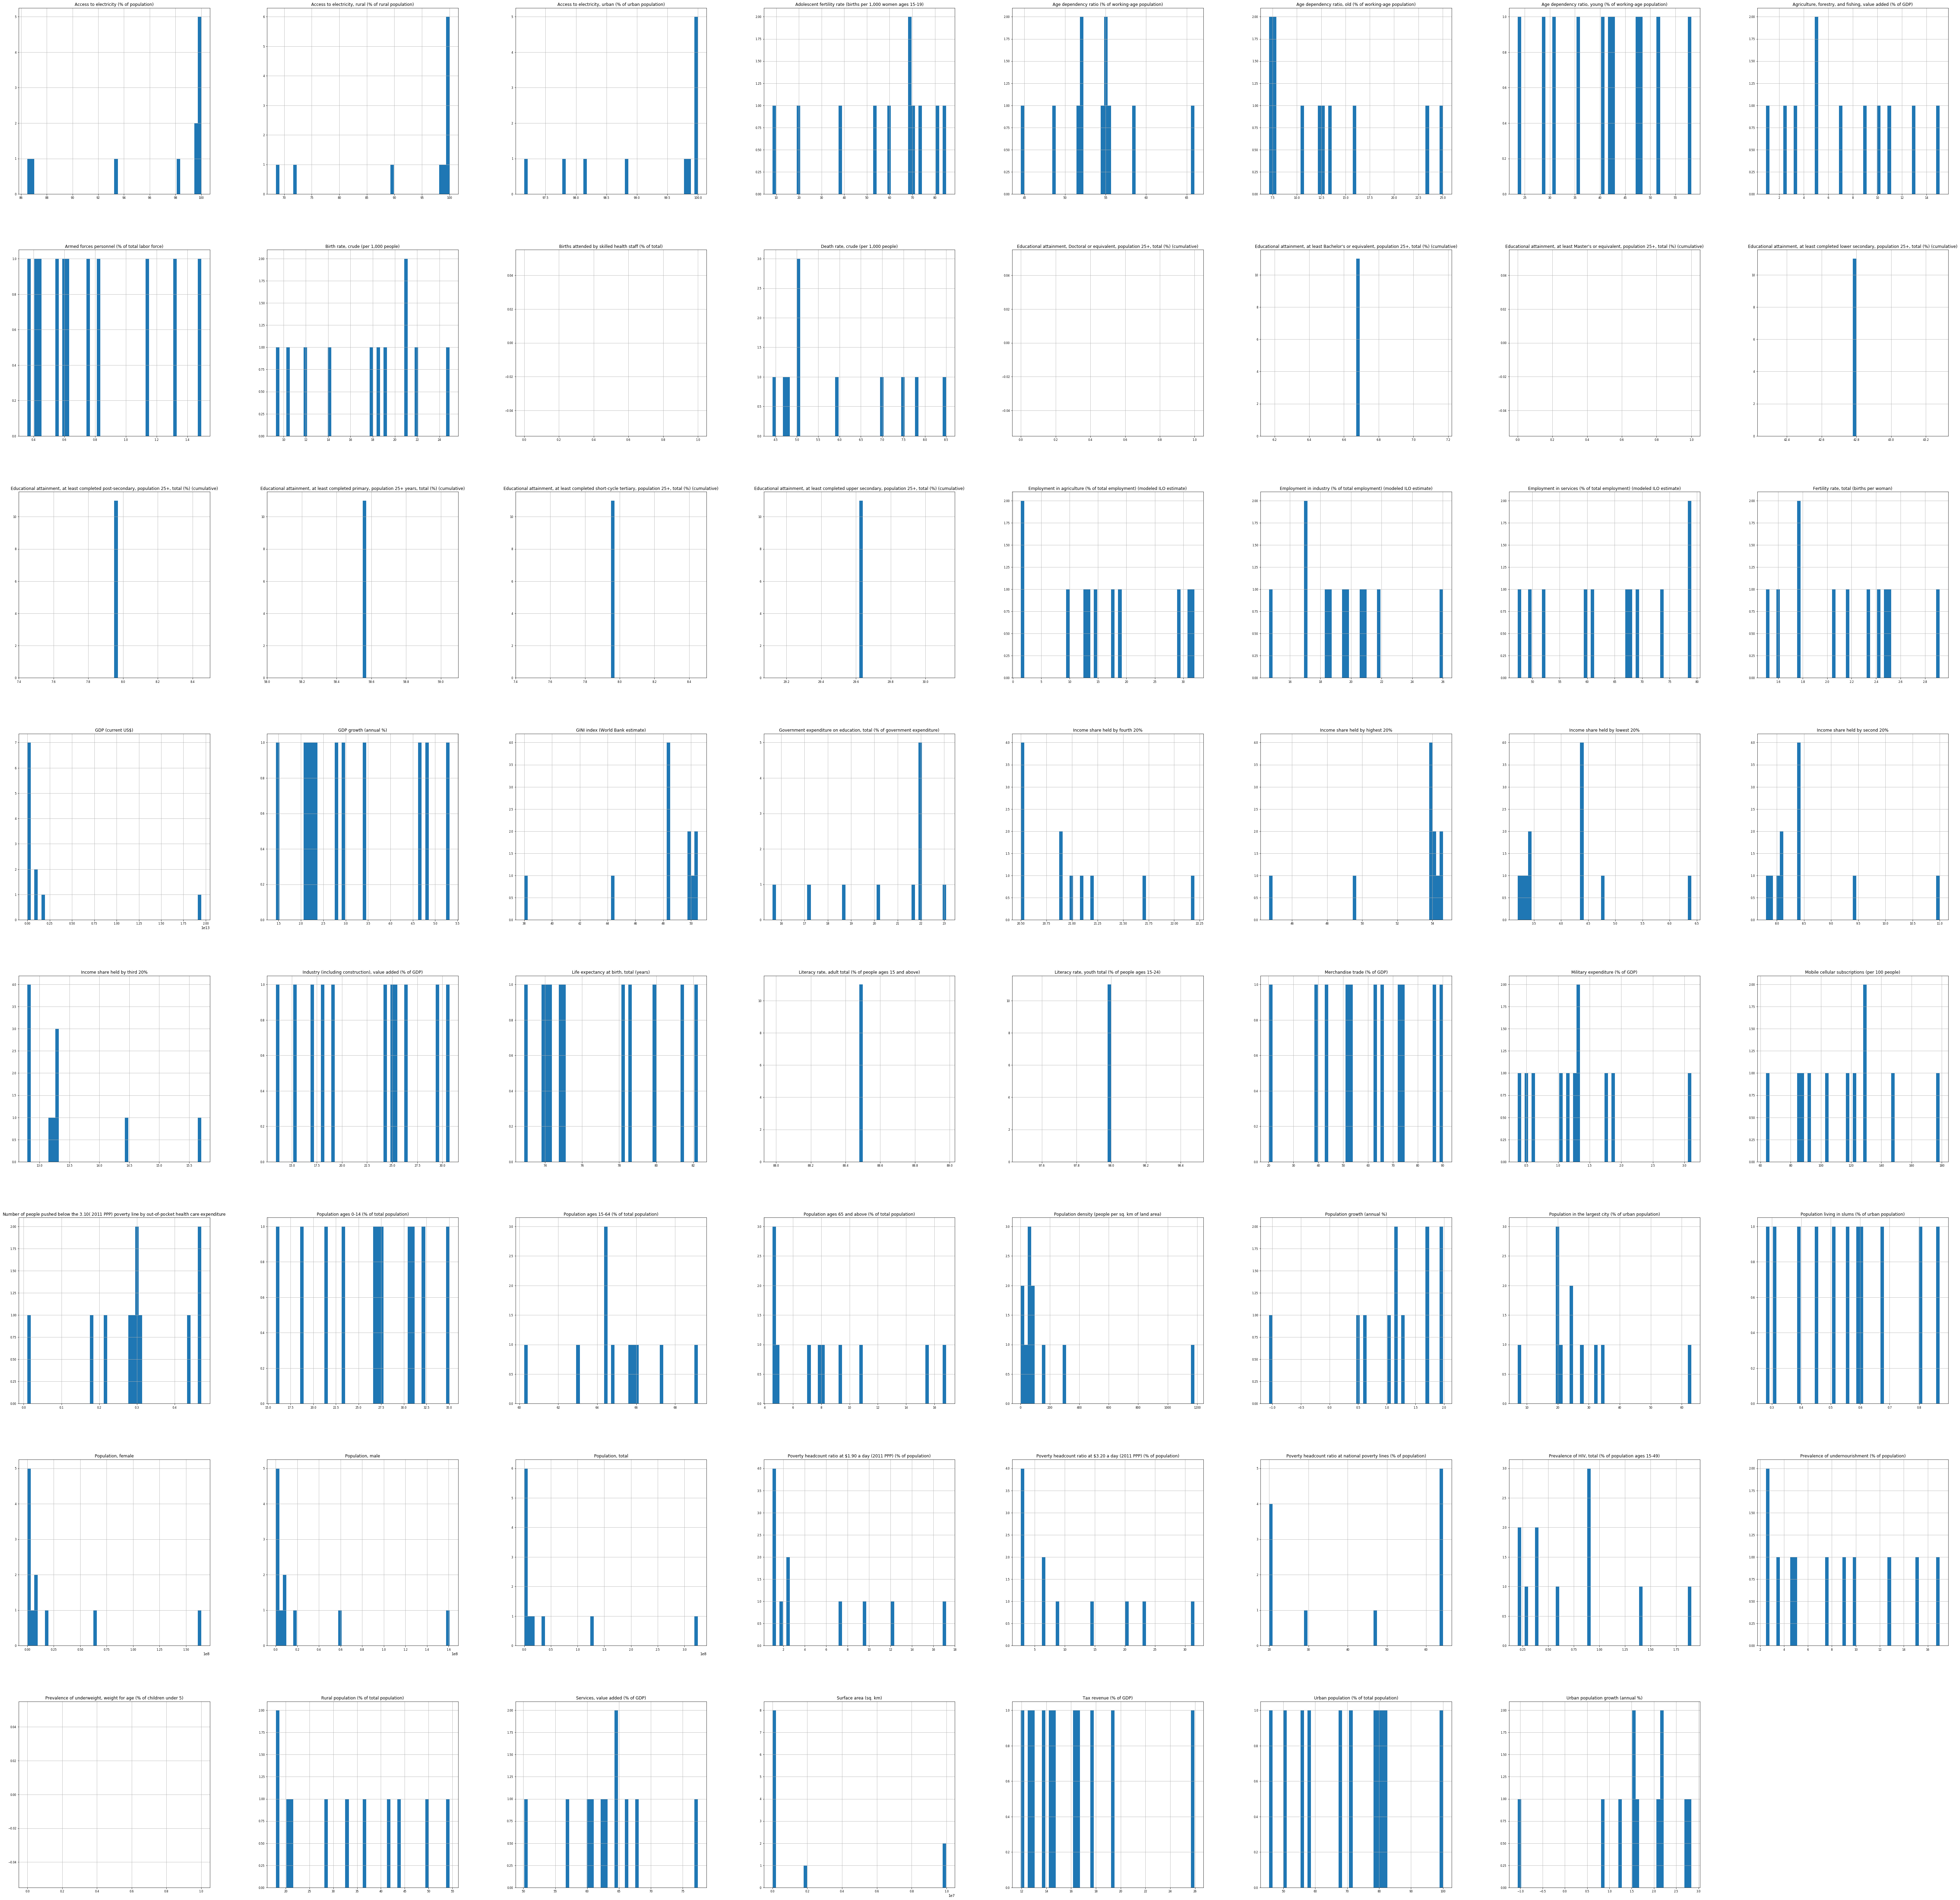

In [ ]:
#Plotting histogram
df=df_col_merged.select_dtypes(include=['float64','int64'])
df.hist(figsize=(100,100),bins=50,xlabelsize=8,ylabelsize=8)

In [ ]:
#Finding the correlation
df_num_corr = df.corr()['Urban population growth (annual %)'][:-1] # -1 because the latest row is Urban population growth (annual %)
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Urban population growth (annual %):\n{}".format(len(golden_features_list), golden_features_list))

There is 16 strongly correlated values with Urban population growth (annual %):
Population growth (annual %)                                                0.928025
Birth rate, crude (per 1,000 people)                                        0.795573
Fertility rate, total (births per woman)                                    0.712328
Employment in agriculture (% of total employment) (modeled ILO estimate)    0.574909
Adolescent fertility rate (births per 1,000 women ages 15-19)               0.558955
Population ages 0-14 (% of total population)                                0.554842
Age dependency ratio, young (% of working-age population)                   0.550873
Prevalence of undernourishment (% of population)                            0.508687
Age dependency ratio, old (% of working-age population)                    -0.549434
Population ages 65 and above (% of total population)                       -0.553826
Life expectancy at birth, total (years)                               

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


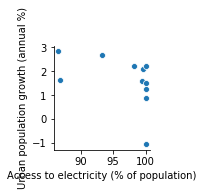

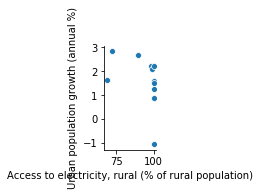

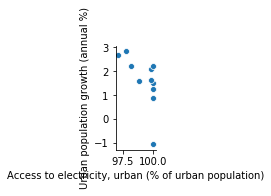

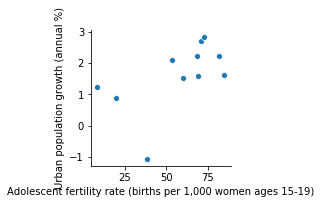

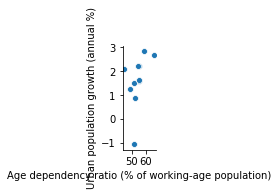

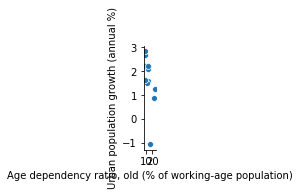

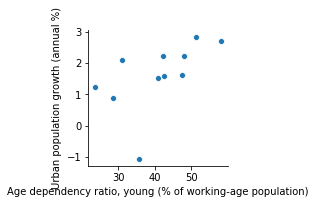

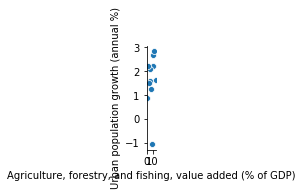

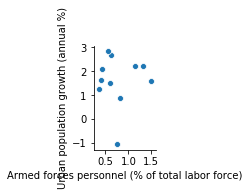

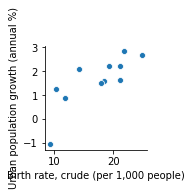

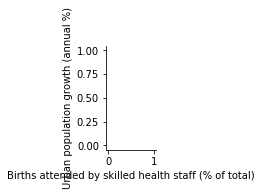

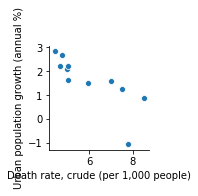

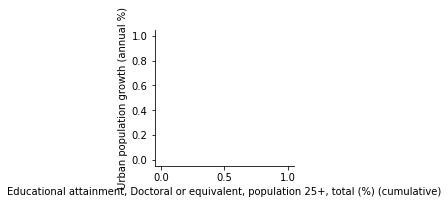

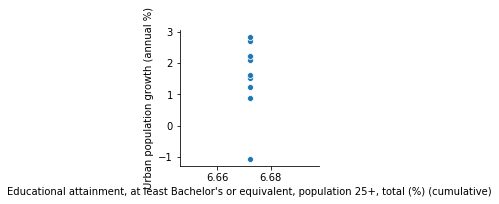

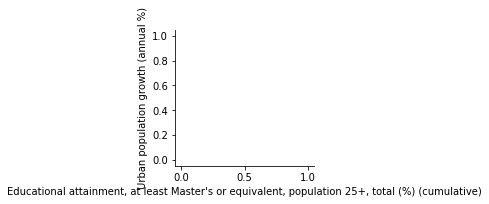

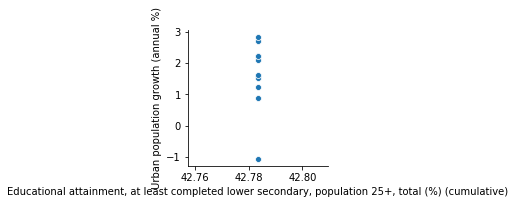

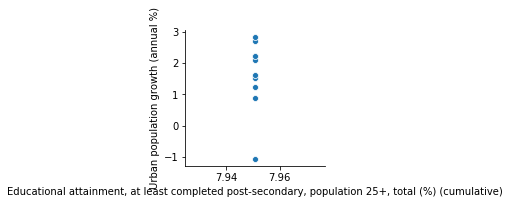

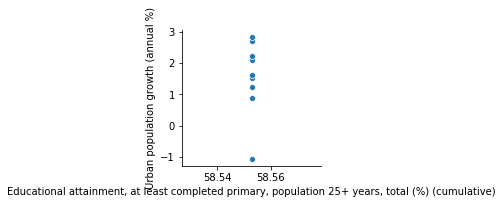

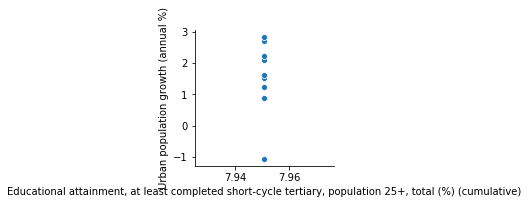

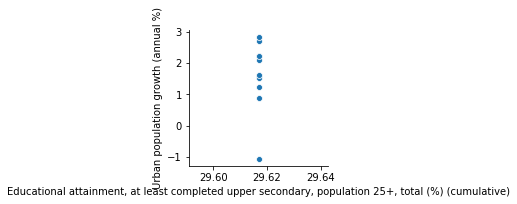

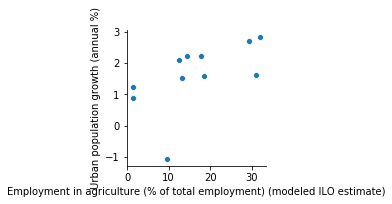

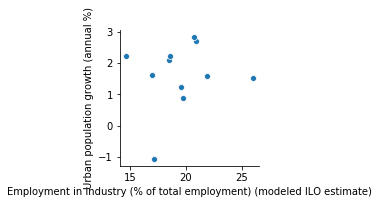

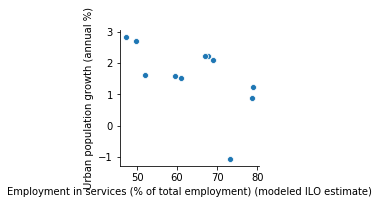

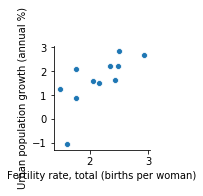

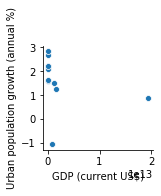

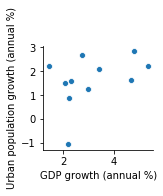

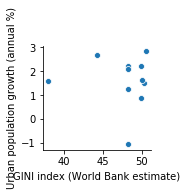

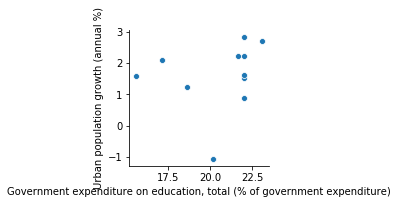

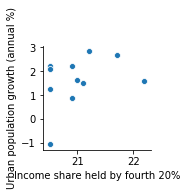

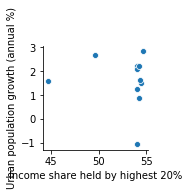

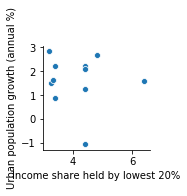

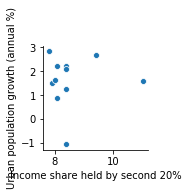

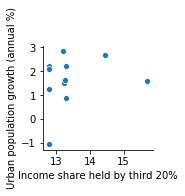

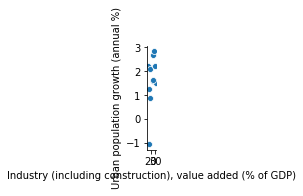

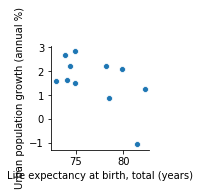

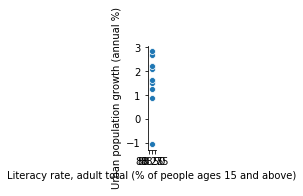

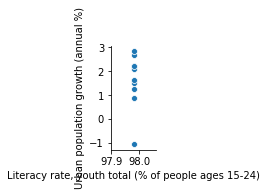

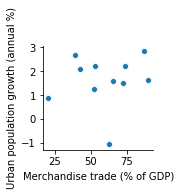

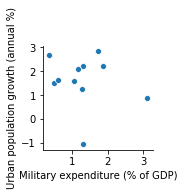

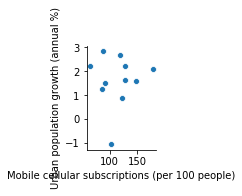

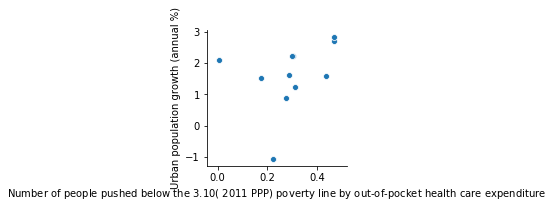

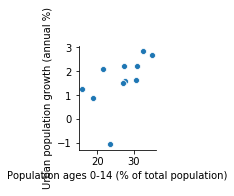

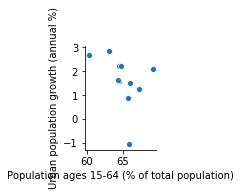

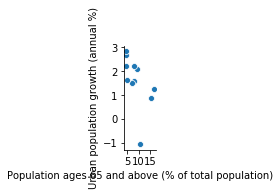

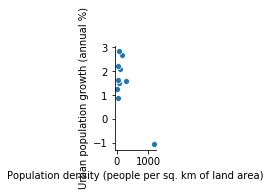

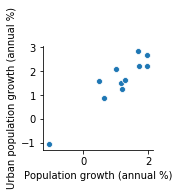

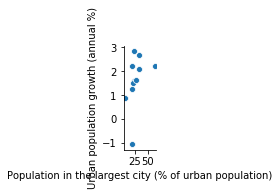

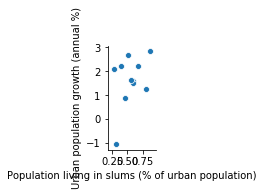

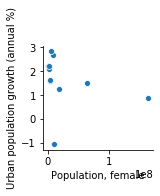

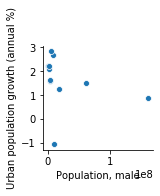

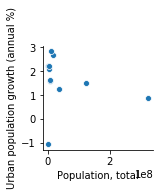

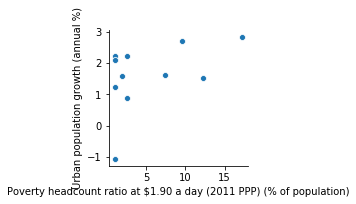

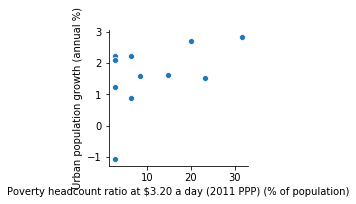

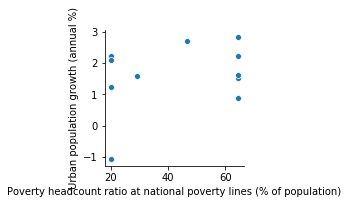

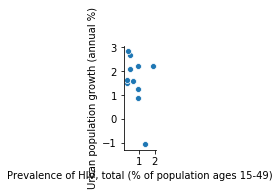

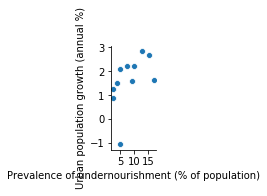

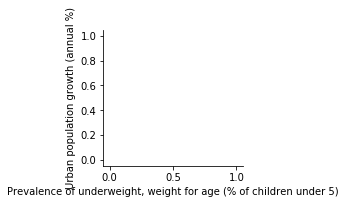

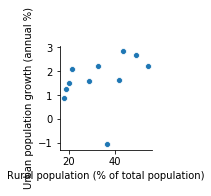

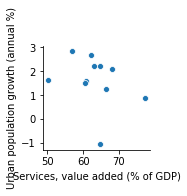

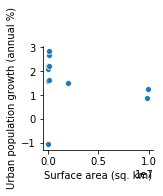

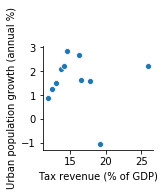

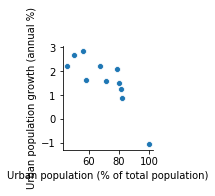

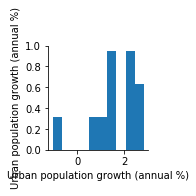

In [ ]:
#Visulaizing data
for i in range(0, len(df.columns)):
    sns.pairplot(data=df,
                x_vars=df.columns[i],
                y_vars=['Urban population growth (annual %)'])

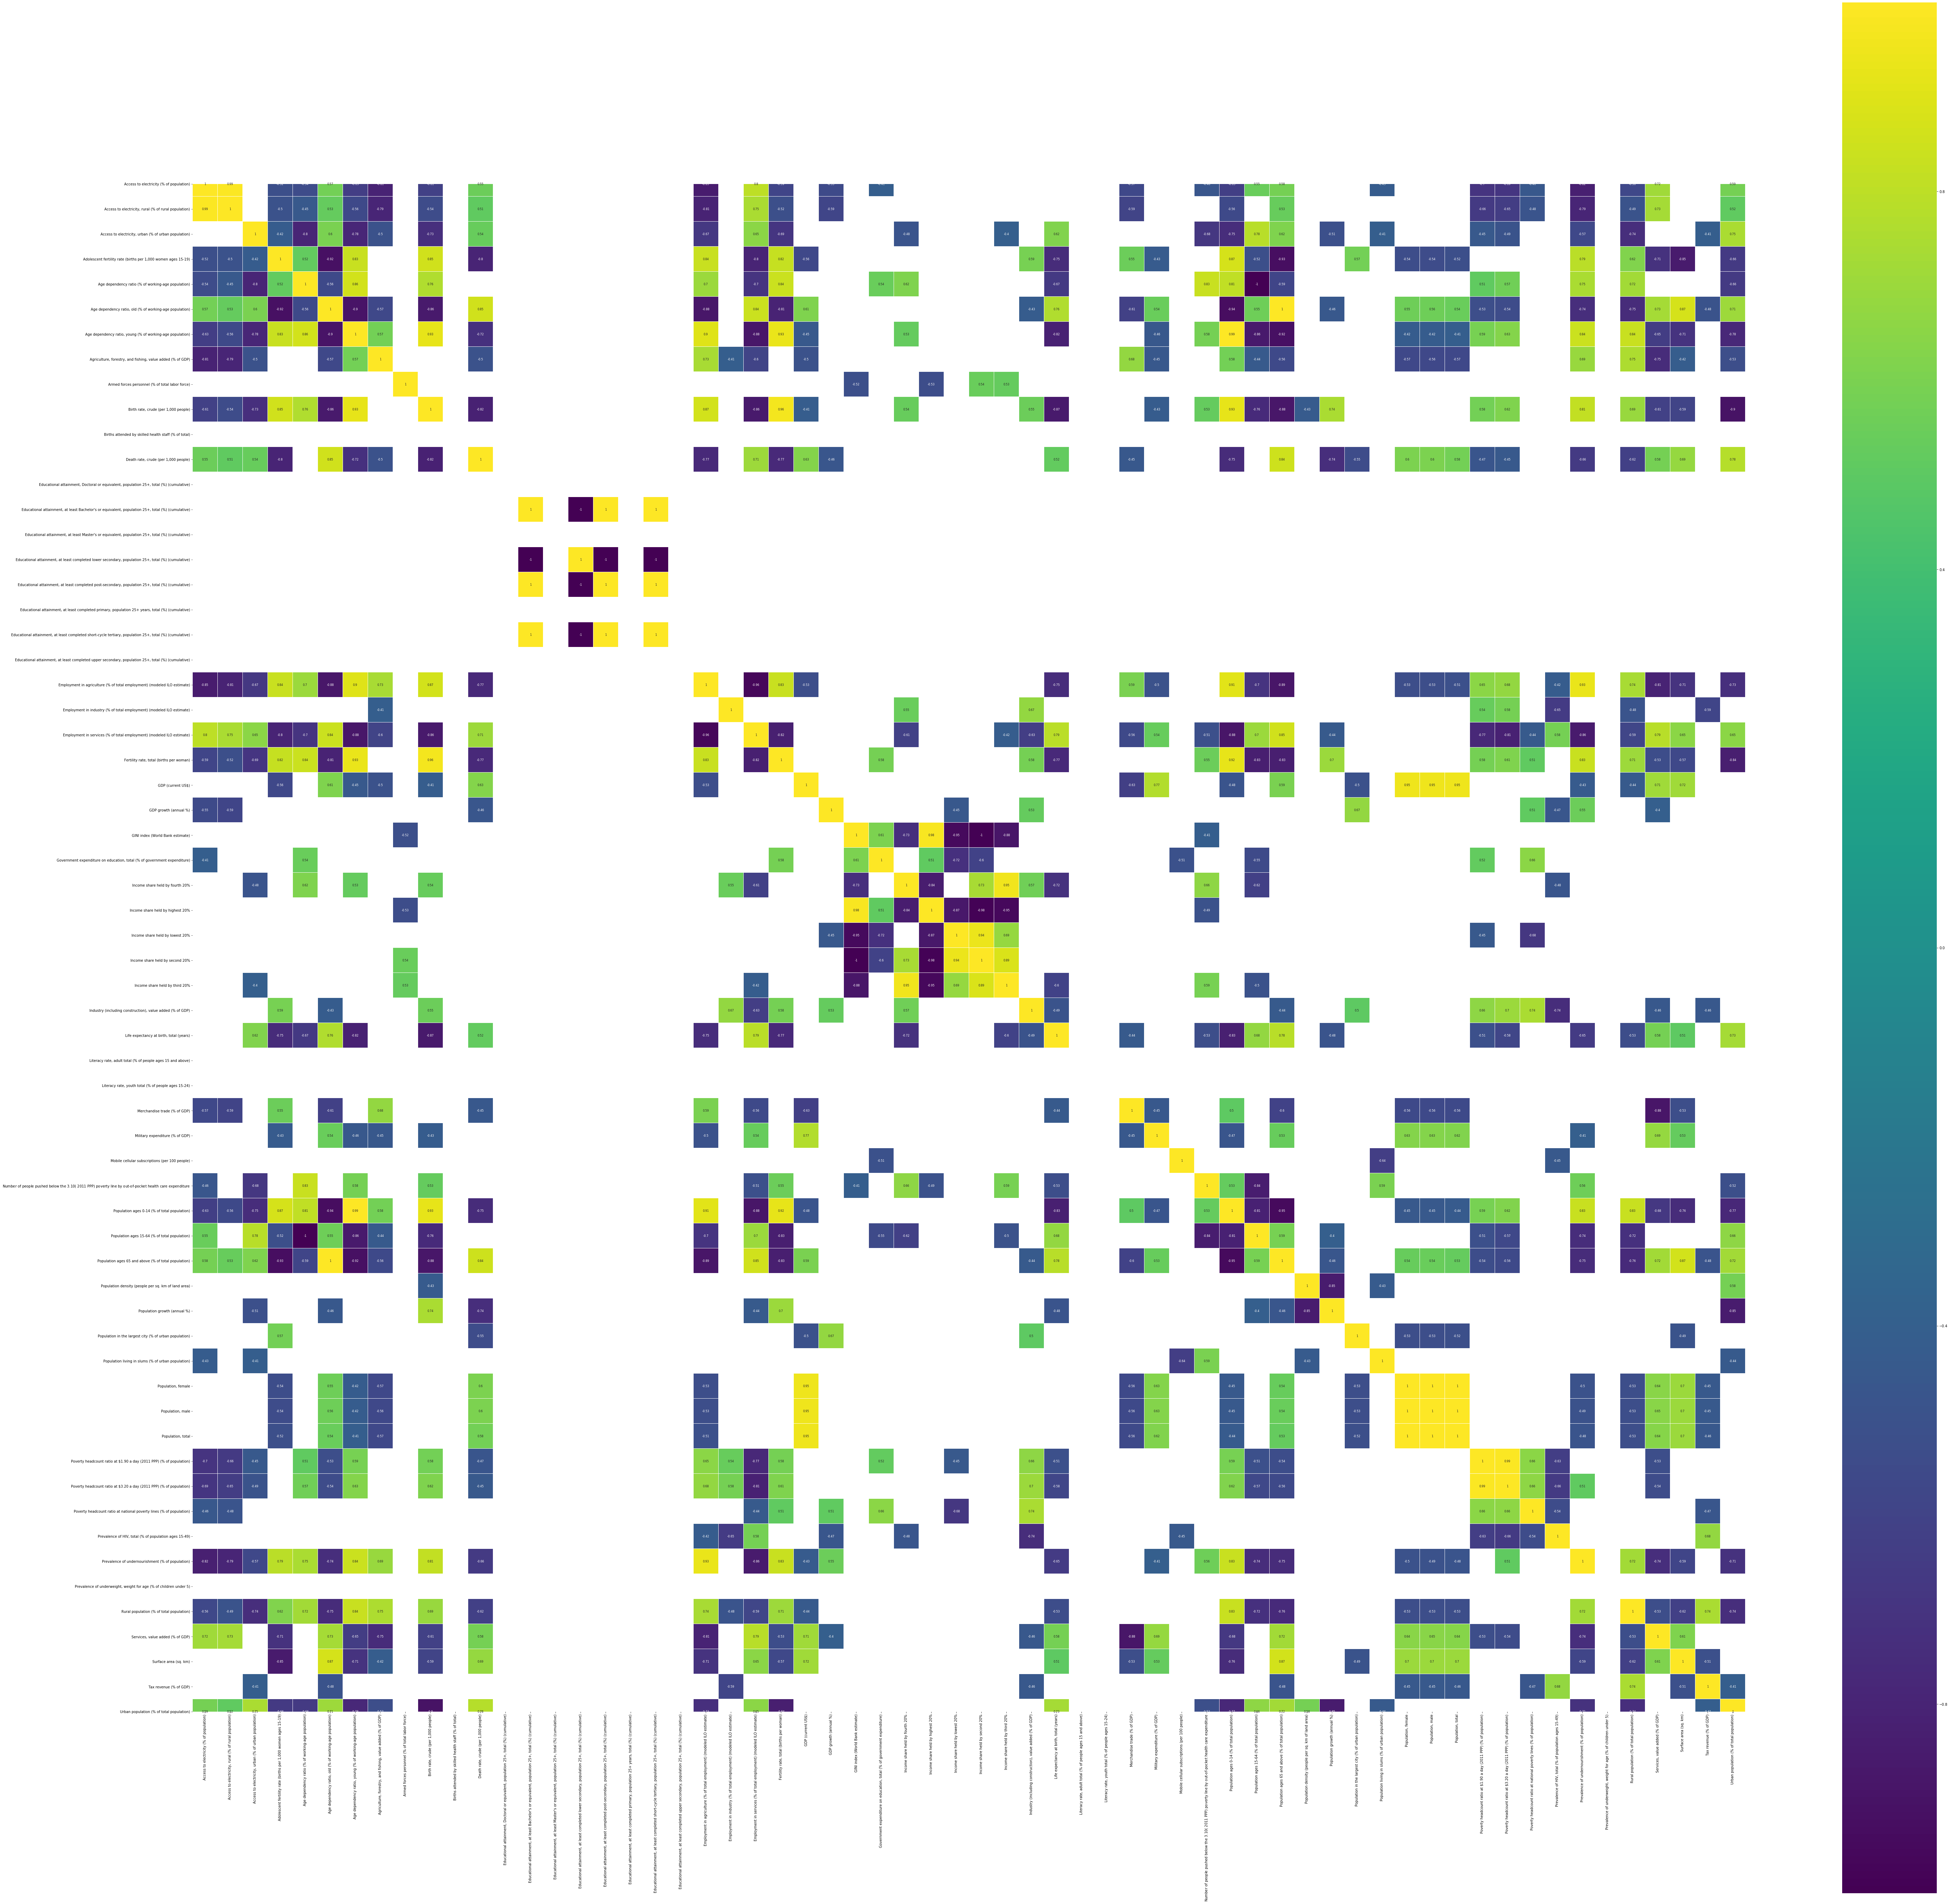

In [ ]:
#Visualizing correlation data
corr = df.drop('Urban population growth (annual %)', axis=1).corr() # We already examined Urban population growth (annual %) correlations
plt.figure(figsize=(150, 150))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);